## Objective:

The purpose of this report is to analyze the resale values of used vehicles in the pre-owned car market using the Car Dekho dataset, compare key attributes that influence these values, and evaluate the presence of multicollinearity among the predictive factors present.

## Data Dictionary
- **selling_price** - Selling price of the vehicle
- **year** - Year of manufacture of the vehicle
- **km_driven** - Km driven
- **mileage** - Fuel mileage
- **engine** - Engine capacity of the vehicle
- **max_power** - Horsepower of vehicle
- **age** - Age of the vehicle
- **make** - Manufacturer of the vehicle
- **model** - Model of the vehicle
- **Individual** - Individual Seller Type 
- **Trustmark Dealer** - Trustmark Dealer Seller Type
- **Diesel** - Diesel fuel type
- **Electric** - Electric fuel type
- **LPG** - LPG fuel type
- **Petrol** - Petrol fuel type
- **Manual** - Manual or Automatic
- **X5** - Vehicle Feature
- **X.5** - Vehicle Feature


## Reading in our data set

In [214]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px #plotly!
import scipy.stats as stats


# Libraries to help with the linear model and the relaibility of the model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [215]:
#read in data
#get wd
df = pd.read_csv('car-price-cleaned.csv')
#print(df)

In [216]:
print("Shape of the DataFrame (rows, columns):", df.shape)

Shape of the DataFrame (rows, columns): (19820, 18)


In [217]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,X5,X.5
0,1.20,2012,120000,19.70,796.0,46.30,11,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016,20000,18.90,1197.0,82.00,7,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010,60000,17.00,1197.0,80.00,13,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012,37000,20.92,998.0,67.10,11,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015,30000,22.77,1498.0,98.59,8,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [218]:
df.info()
#all numeric values except for make and model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     19820 non-null  float64
 1   year              19820 non-null  int64  
 2   km_driven         19820 non-null  int64  
 3   mileage           19820 non-null  float64
 4   engine            19820 non-null  float64
 5   max_power         19820 non-null  float64
 6   age               19820 non-null  int64  
 7   make              19820 non-null  object 
 8   model             19820 non-null  object 
 9   Individual        19820 non-null  int64  
 10  Trustmark Dealer  19820 non-null  int64  
 11  Diesel            19820 non-null  int64  
 12  Electric          19820 non-null  int64  
 13  LPG               19820 non-null  int64  
 14  Petrol            19820 non-null  int64  
 15  Manual            19820 non-null  int64  
 16  X5                19820 non-null  int64 

Within this data set, we see mostly numeric values. Our two categorical values belong to Make and Model.

In [220]:
df.duplicated().sum()

159

In [221]:
df.isna().sum()

selling_price       0
year                0
km_driven           0
mileage             0
engine              0
max_power           0
age                 0
make                0
model               0
Individual          0
Trustmark Dealer    0
Diesel              0
Electric            0
LPG                 0
Petrol              0
Manual              0
X5                  0
X.5                 0
dtype: int64

We see 159 instances that are duplicated within this data set. We choose not to treat these duplicates, as it makes sense that the same make and model will have the same price and other similar attributes. Within this dataset, we see no missing values.

In [223]:
df.nunique()

selling_price        964
year                  27
km_driven           4476
mileage              532
engine               167
max_power            484
age                   27
make                  41
model               3233
Individual             2
Trustmark Dealer       2
Diesel                 2
Electric               2
LPG                    2
Petrol                 2
Manual                 2
X5                     2
X.5                    2
dtype: int64

In [224]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
selling_price,19820.0,6.585509,4.847364,0.3,3.41,5.2,7.85,2.090250e+01
year,19820.0,2014.561453,3.196636,1992.0,2013.00,2015.0,2017.00,2.021000e+03
km_driven,19820.0,58158.555348,51715.628176,100.0,31000.00,52000.0,74000.00,3.800000e+06
mileage,19820.0,19.503402,4.297784,4.0,16.95,19.3,22.32,1.200000e+02
engine,19820.0,1475.702381,518.571223,0.0,1197.00,1248.0,1582.00,6.752000e+03
max_power,19820.0,98.122907,44.761727,5.0,73.90,86.8,112.00,6.260000e+02
age,19820.0,8.438547,3.196636,2.0,6.00,8.0,10.00,3.100000e+01
Individual,19820.0,0.390666,0.487912,0.0,0.00,0.0,1.00,1.000000e+00
Trustmark Dealer,19820.0,0.009586,0.097442,0.0,0.00,0.0,0.00,1.000000e+00
Diesel,19820.0,0.492583,0.499958,0.0,0.00,0.0,1.00,1.000000e+00


- Within this data set there are **41** different makes and **3233** different models. Year and age both have **27** different unique values.
- **Individual**, **Trustmark Dealer**, **Diesel**, **Electric**, **LPG**, **Petrol**, **Manual**,**X5** and **X.5** are all binary variables.
- The years of vehicles within this data set are between **1992** and **2021** with the average year being around **2014**.
- The average selling price is represented as **6.6**.
- The km driven is skewed to the right as the average km driven is **58158.56** and the median is **52000**.
- Mileage has a near normal distribution, where the mean and median are around **19**.
- Engine values are betwenn **1475.7** and **6752.0**.
- Max power is between **98.12** and **626**.
- Related to the year, vehicles in the data set are between **2 years** and **31 years old**.

## EDA

### Numerical Variables

In [228]:
#Function for numerical variables
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

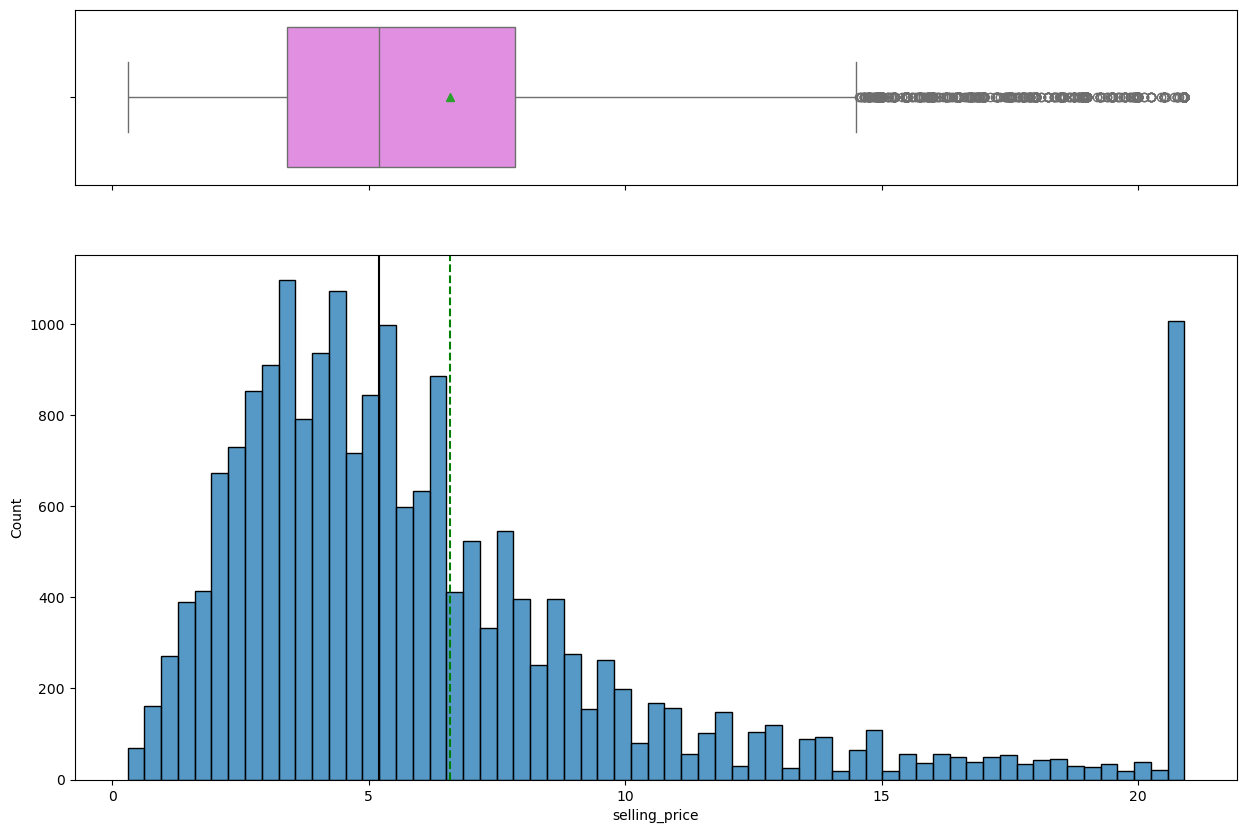

In [229]:
histogram_boxplot(df,'selling_price')

Selling price is skewed to the right with present outliers after 15. The mean selling price is between 5 and 10.

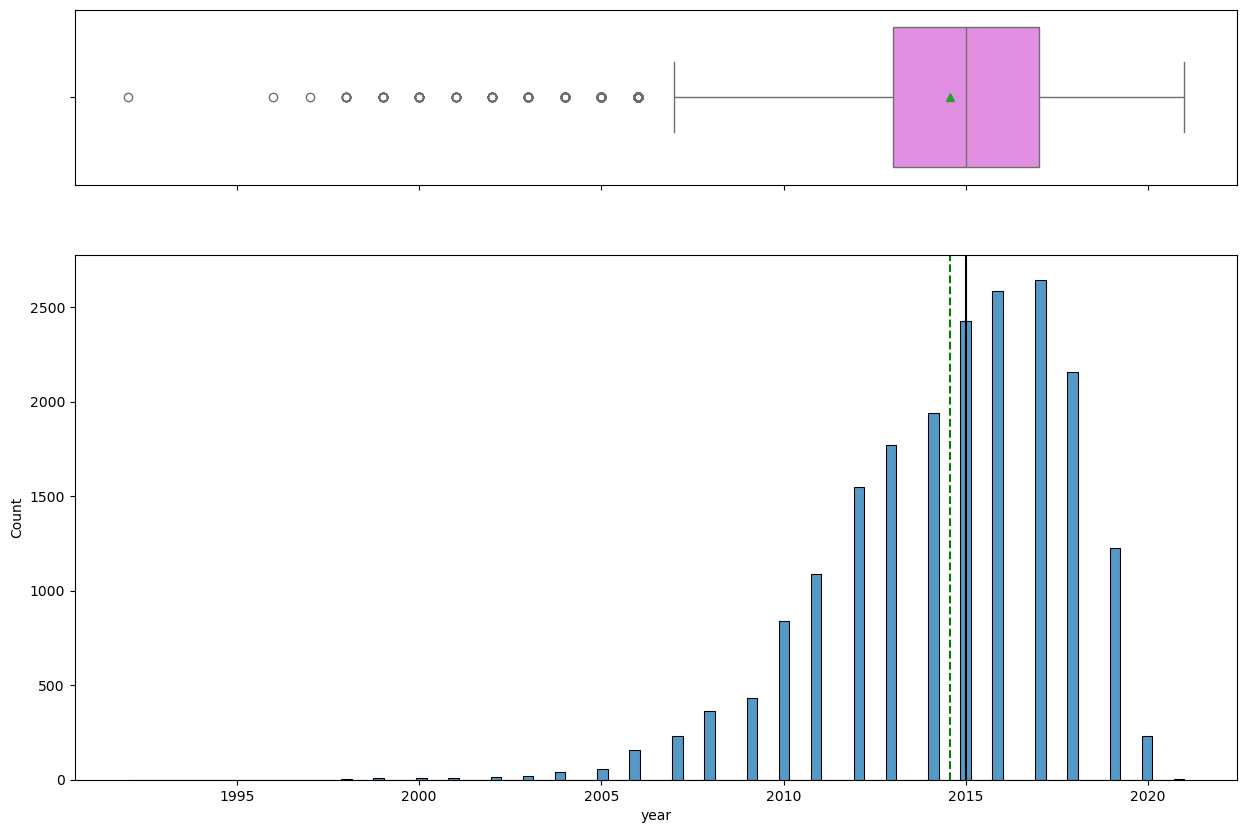

In [231]:
histogram_boxplot(df,'year')

The values of year are skewed to the left, suggesting that newer vehicles are prevalent in the data set.

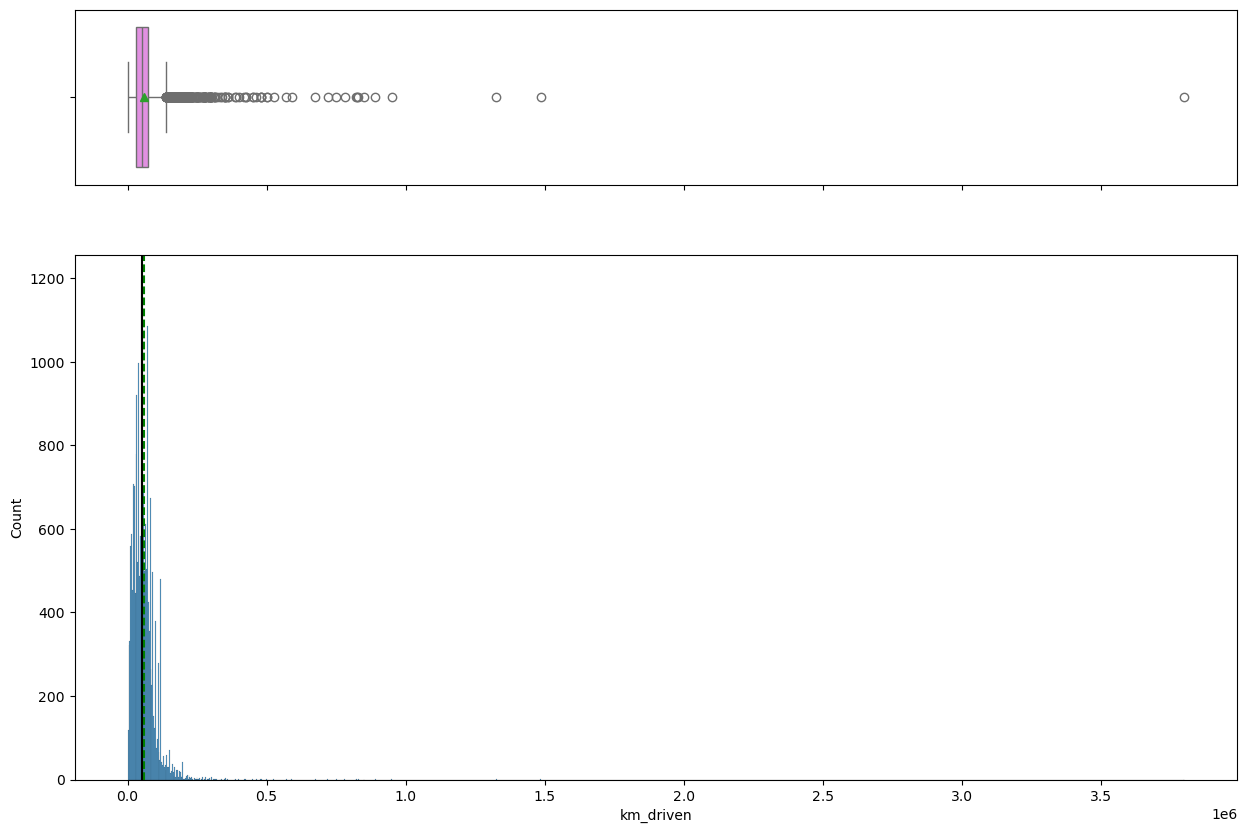

In [233]:
histogram_boxplot(df,'km_driven')

For km driven, there exists prevalent outliers to the right.

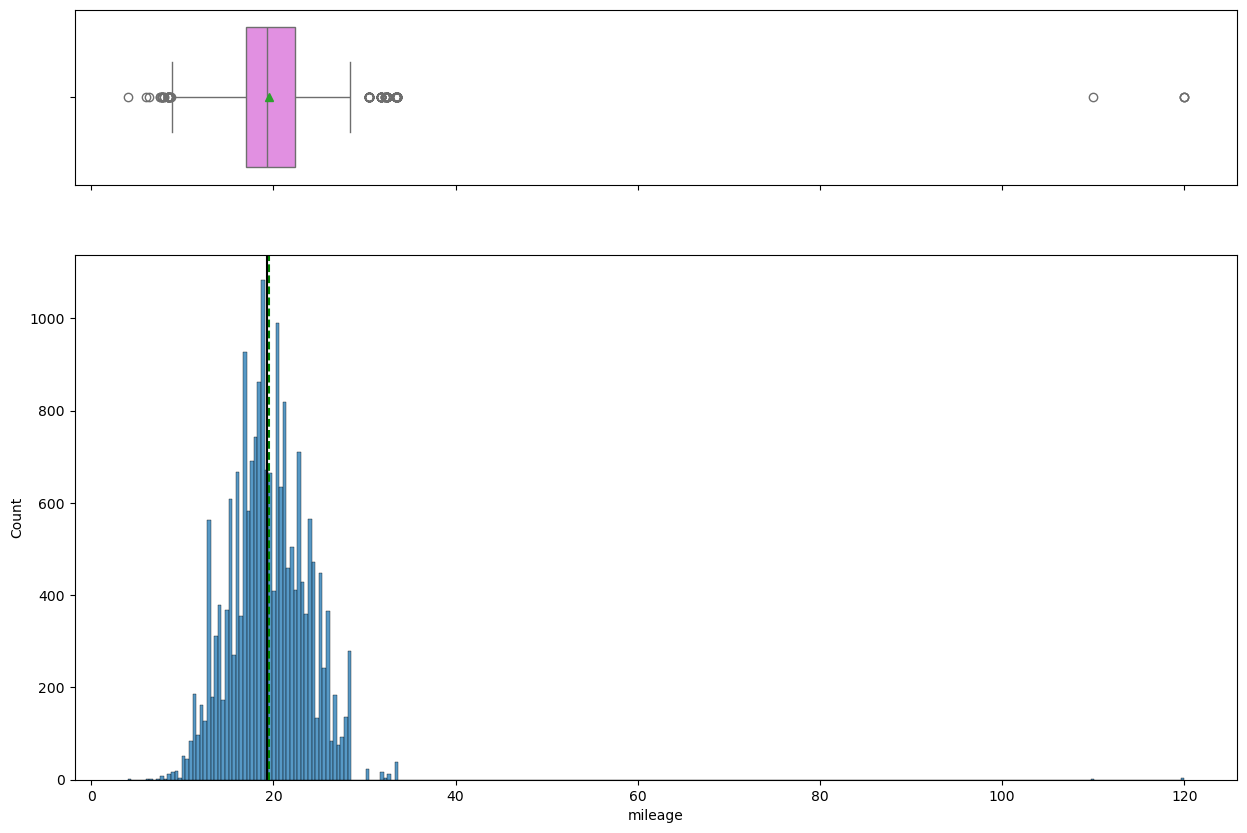

In [235]:
histogram_boxplot(df,'mileage')

Mileage appears to be normally distributed but having outliers to the right. For milage, we see that the median is very close to the mean.

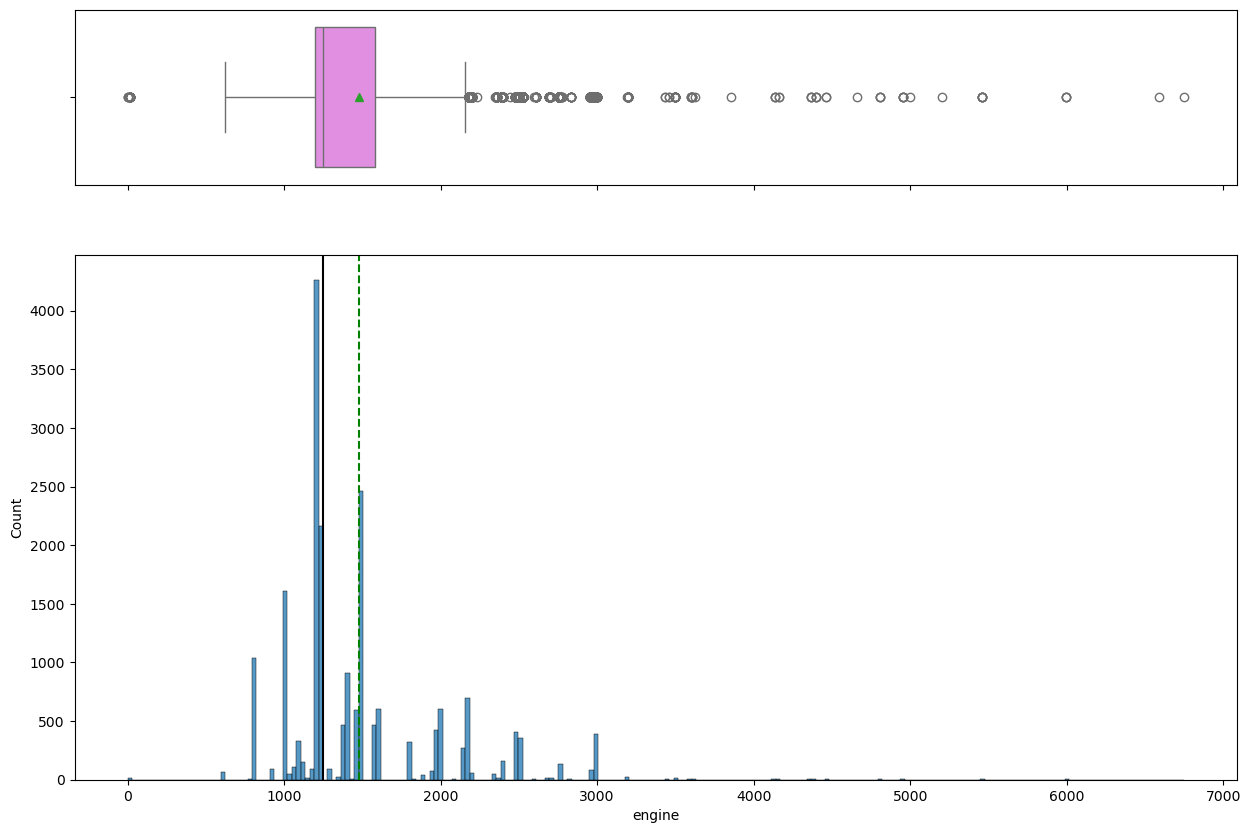

In [237]:
histogram_boxplot(df,'engine')

Engine appears to be skewed to the right, with outliers present after 2000

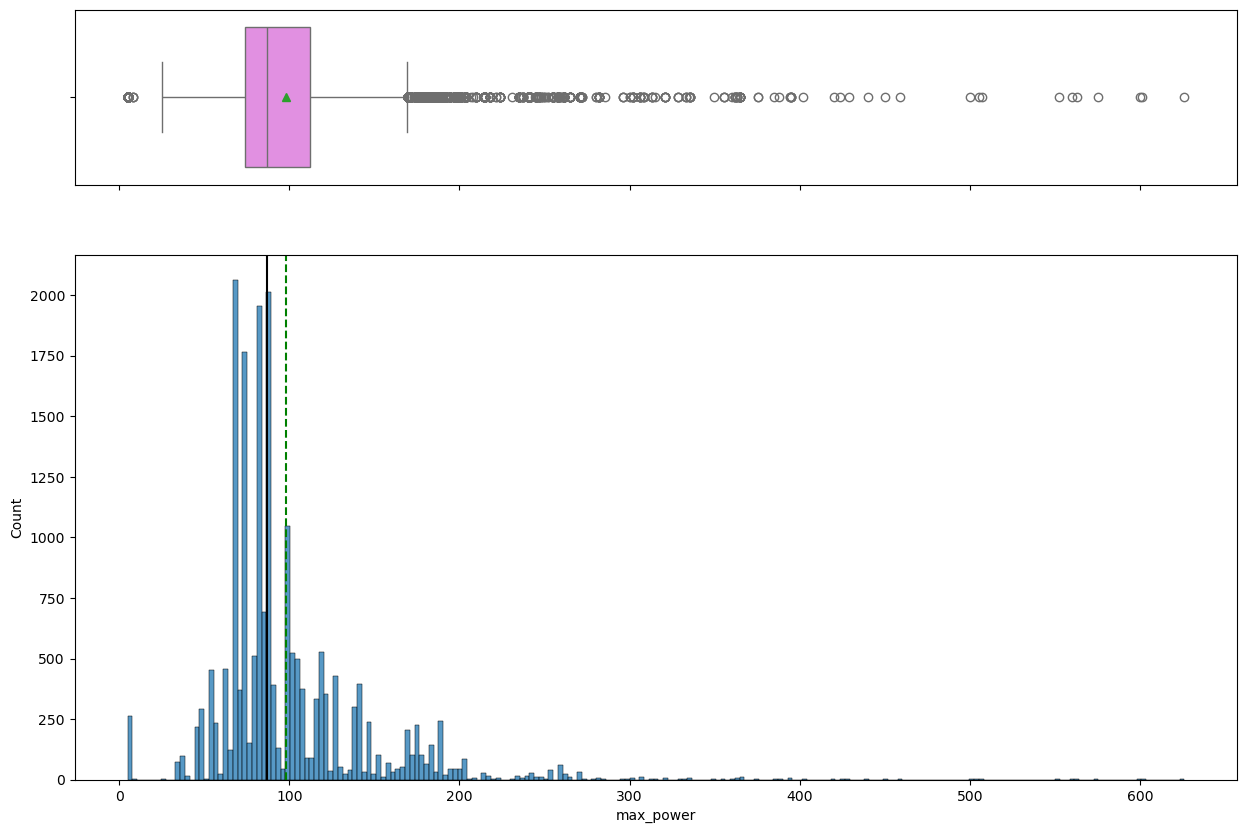

In [239]:
histogram_boxplot(df,'max_power')

Max Power appears to be skewed to the right with outliers present after 200

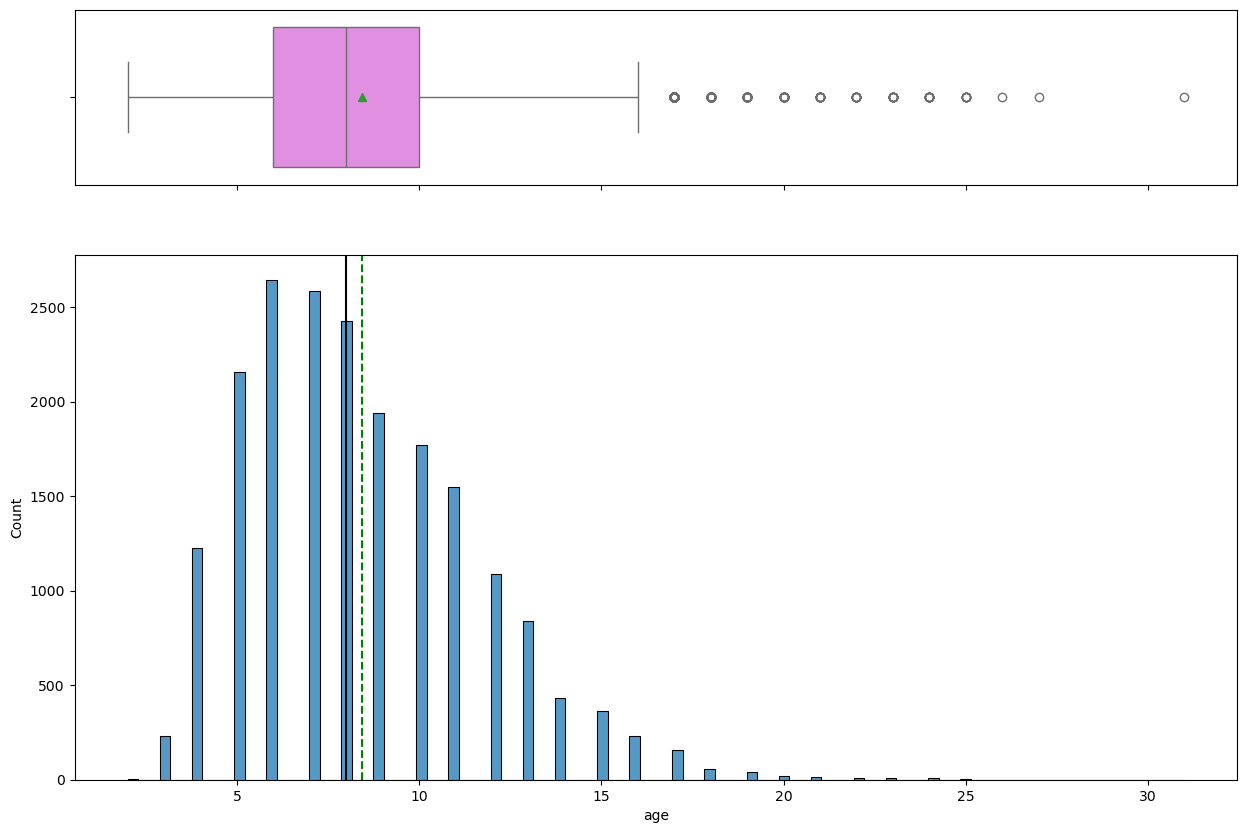

In [241]:
histogram_boxplot(df,'age')

Age is slightly skewed to the right with outliers present after age 15

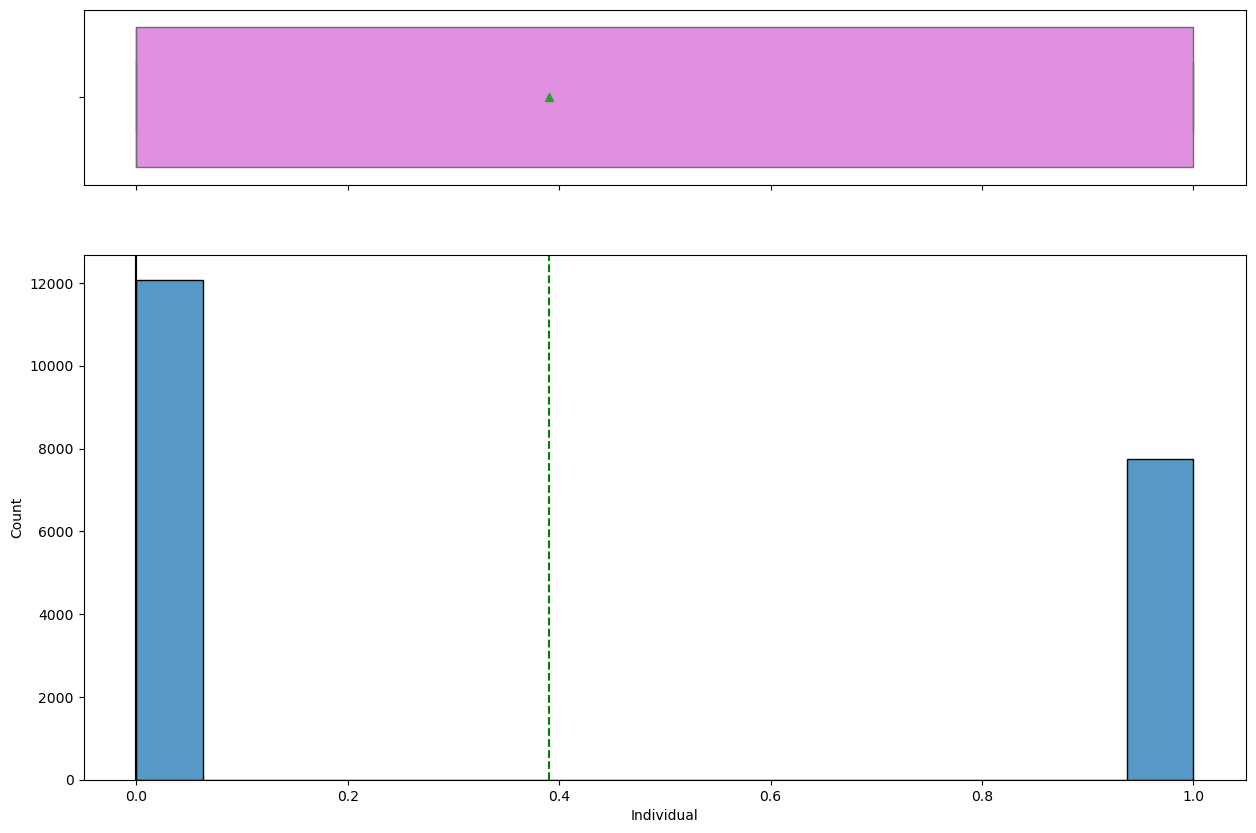

In [243]:
histogram_boxplot(df,'Individual')

There appears to be less Individual Dealers than not.

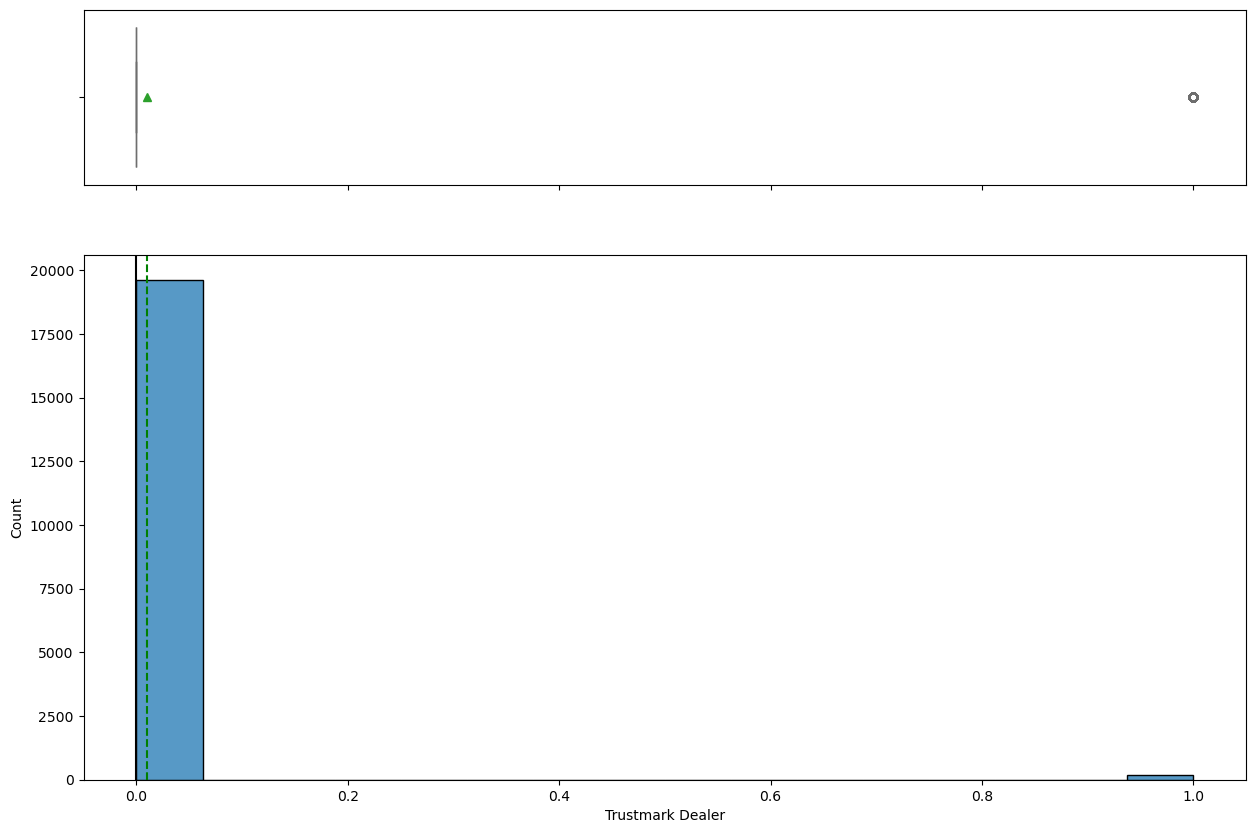

In [245]:
histogram_boxplot(df,'Trustmark Dealer')

Most vehicles come from dealers that are Trustmark Dealers.

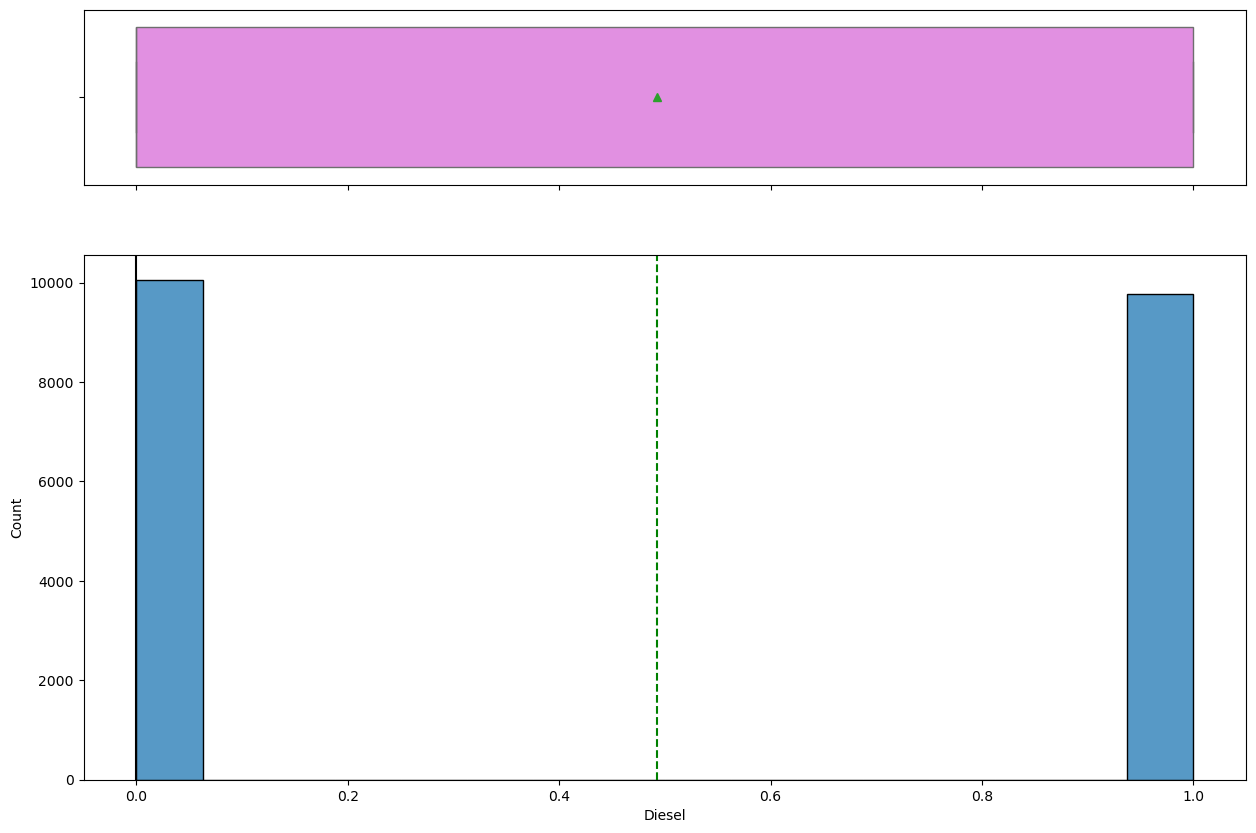

In [247]:
histogram_boxplot(df,'Diesel')

There appears to be a similar amount of Diesel and non-Diesel vehicles in the dataset

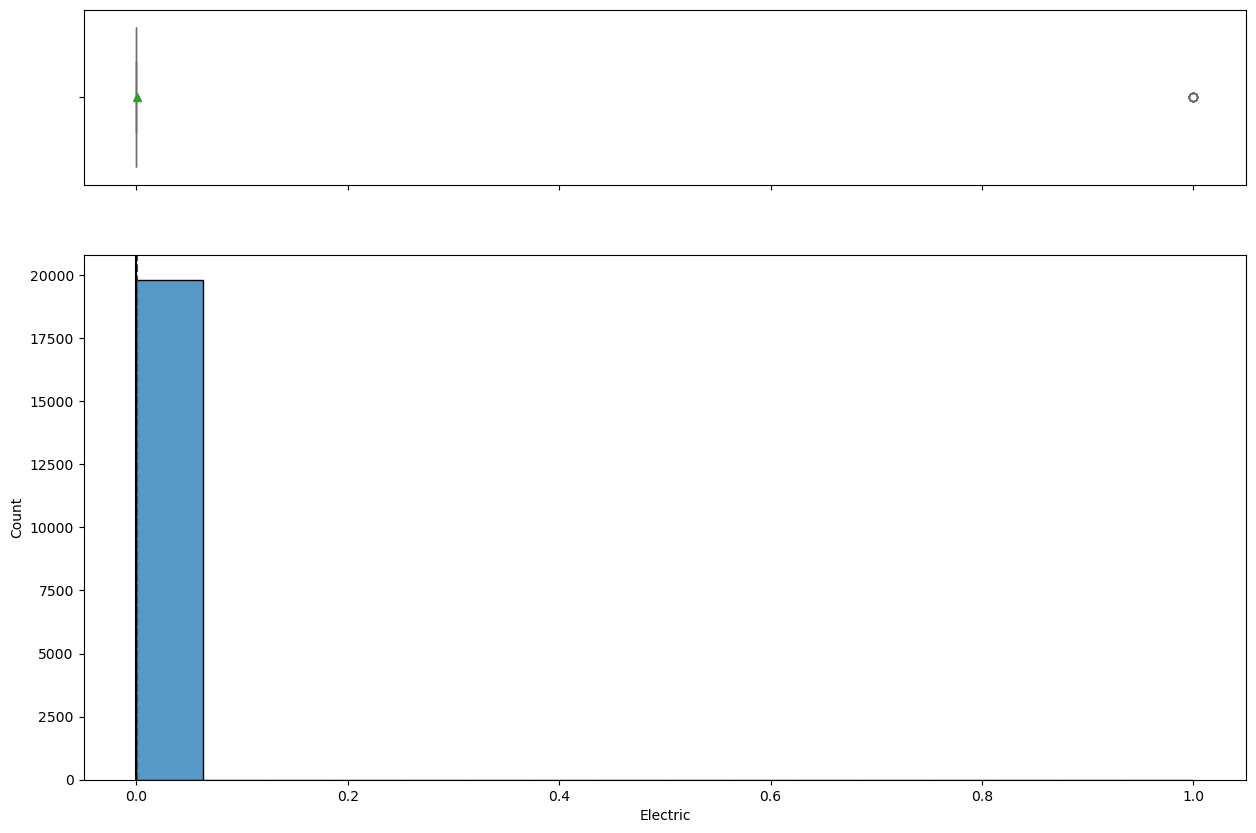

In [249]:
histogram_boxplot(df,'Electric')

There appears to be more vehicles that are not electric over Electric vehicles in the dataset.

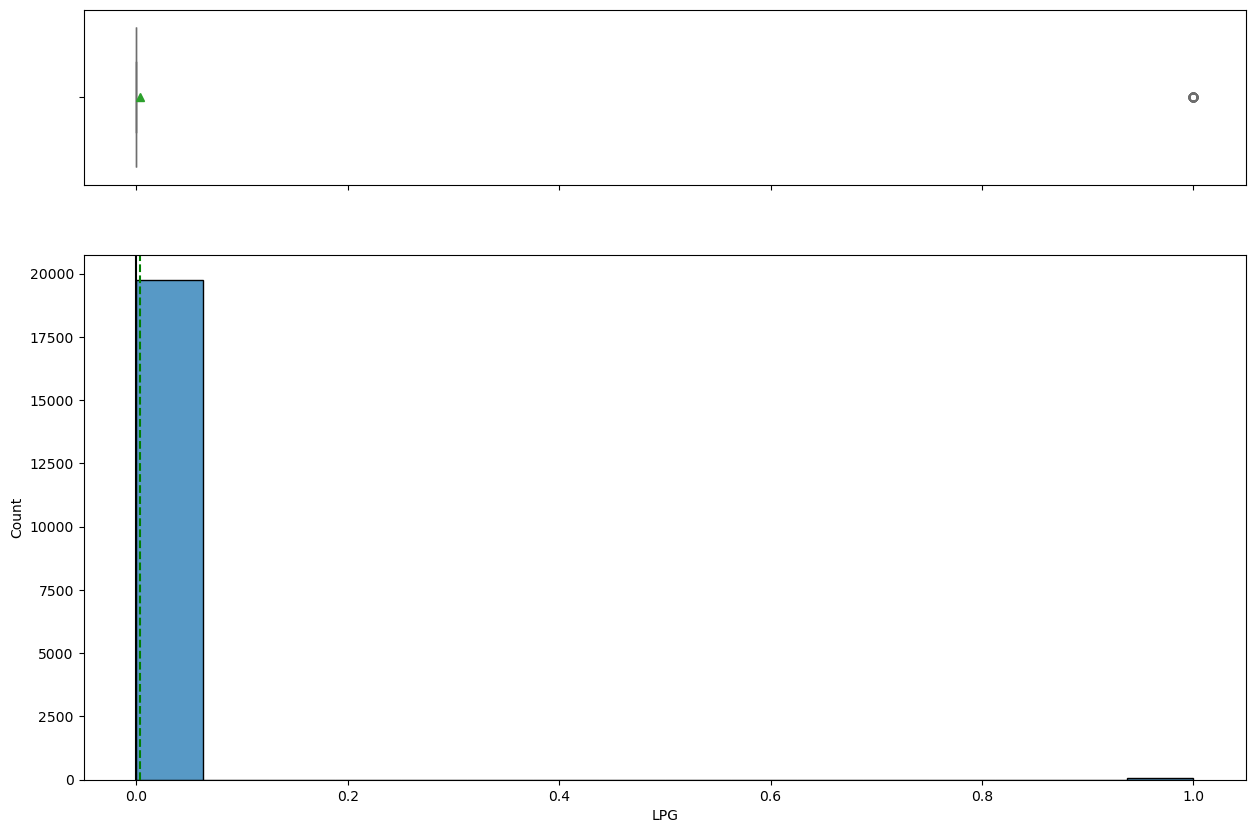

In [251]:
histogram_boxplot(df,'LPG')

There appears to more vehicles that dont belong to LPG than vehicles that are LPG

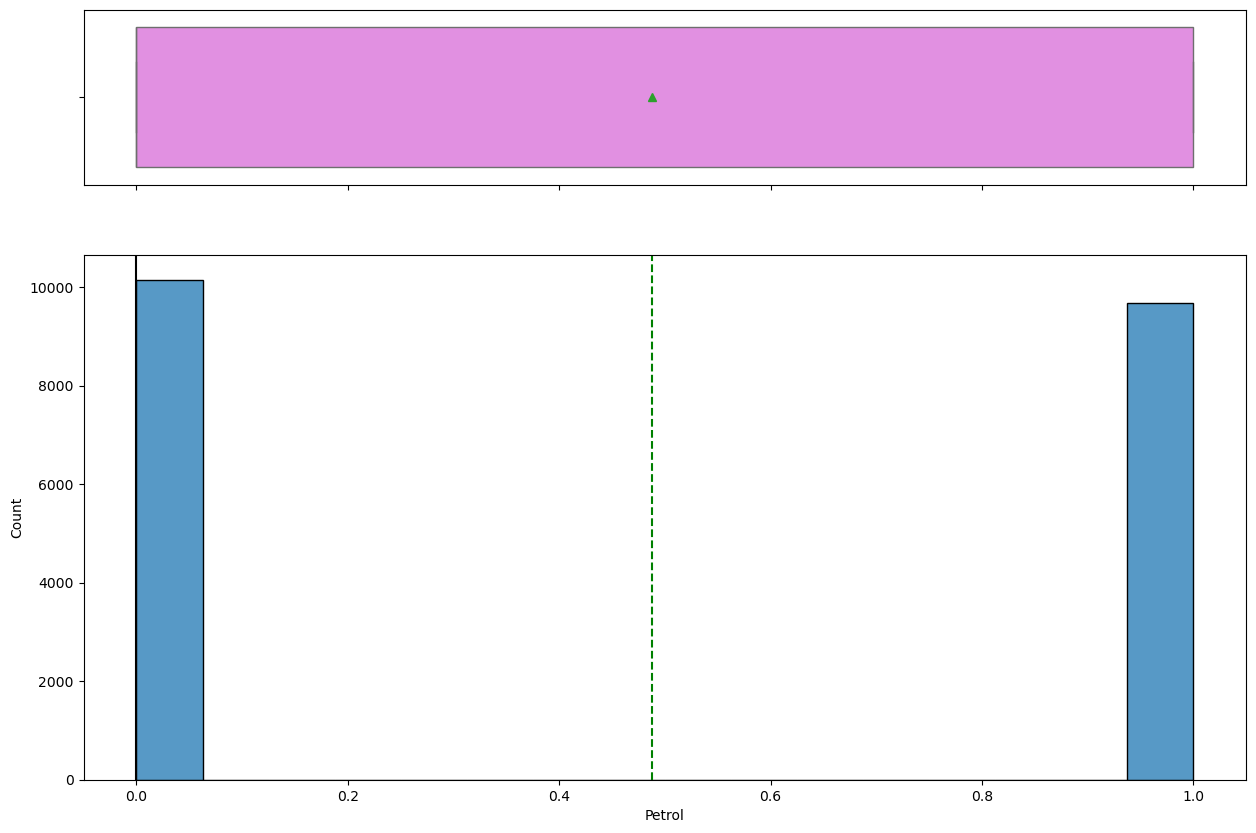

In [253]:
histogram_boxplot(df,'Petrol')

There appears to be a similar amount of Petrol and non Petrol vehicles within the dataset

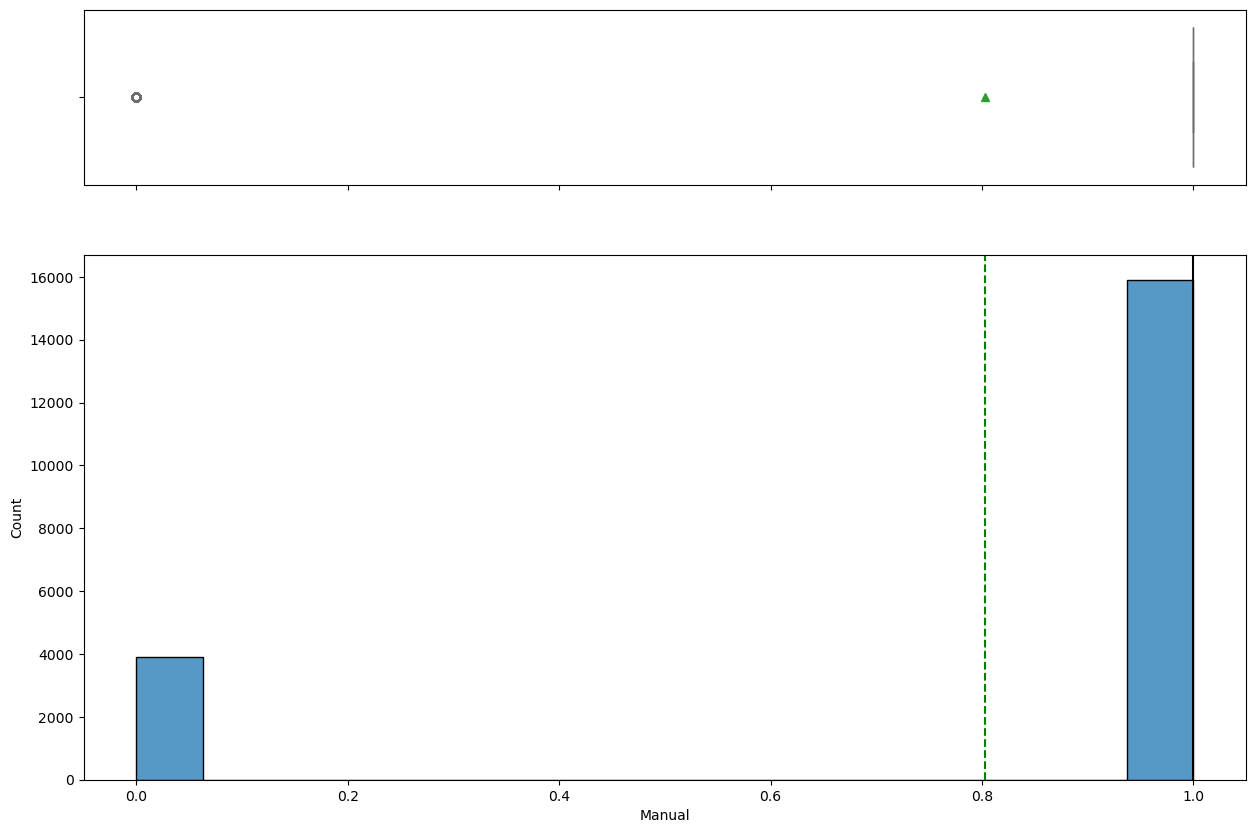

In [255]:
histogram_boxplot(df,'Manual')

There appears to be more vehicles in the dataset that are Manual than not.

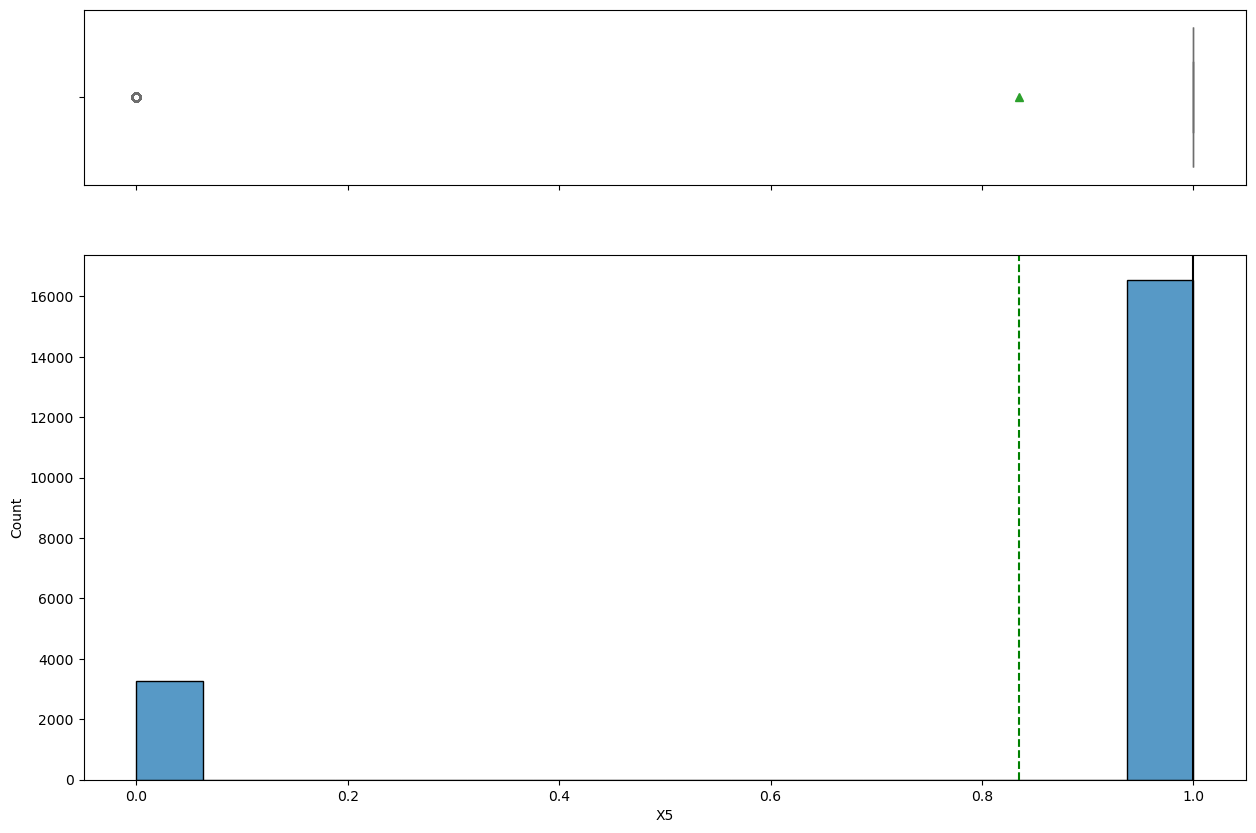

In [257]:
histogram_boxplot(df,'X5')

More vehicles in the dataset are X5 over not X5

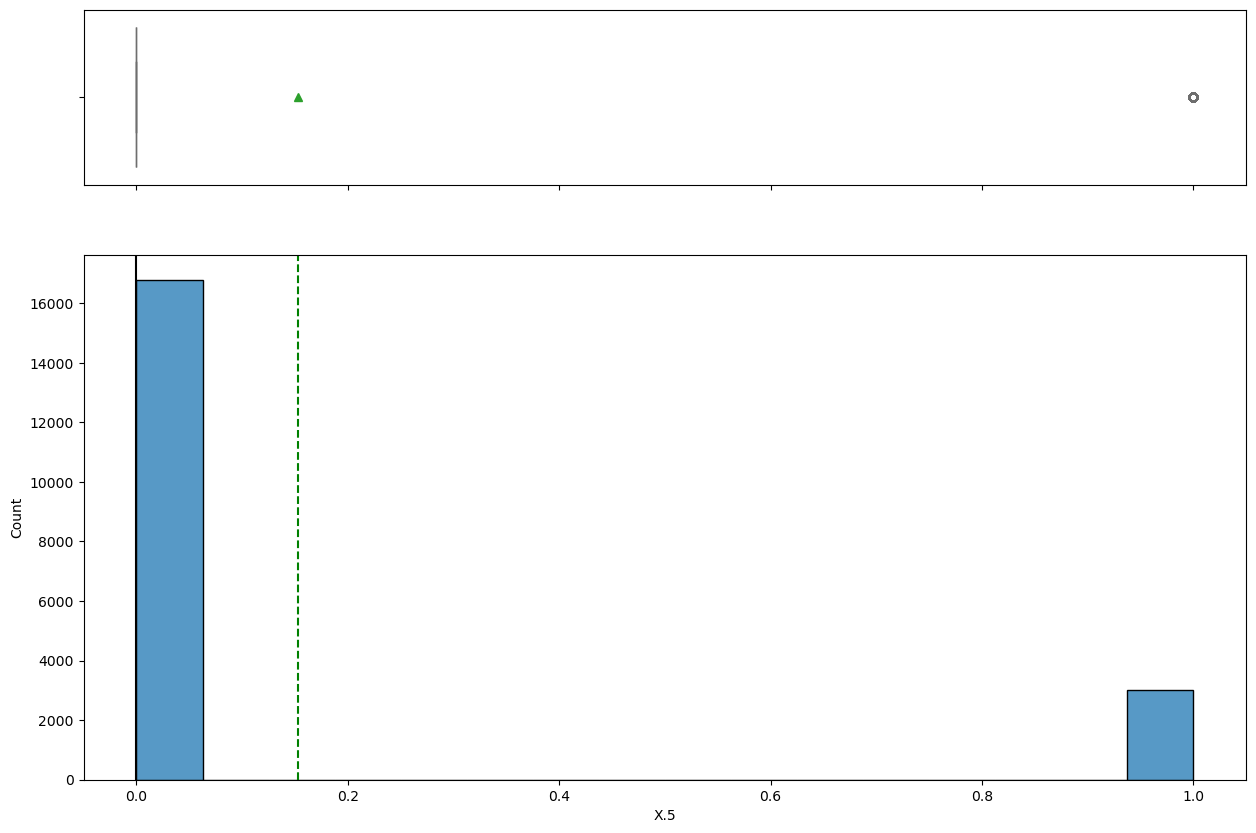

In [259]:
histogram_boxplot(df,'X.5')

More vehicles in the dataset are not X.5

### Categorical Variables


Unique values and counts for make:

             make  Count
0          MARUTI   5650
1         HYUNDAI   3562
2           HONDA   1779
3        MAHINDRA   1276
4          TOYOTA   1189
5            TATA    971
6            FORD    900
7      VOLKSWAGEN    761
8         RENAULT    636
9   MERCEDES-BENZ    485
10            BMW    483
11          SKODA    422
12      CHEVROLET    406
13           AUDI    324
14         NISSAN    289
15         DATSUN    170
16           FIAT    113
17         JAGUAR     80
18           LAND     51
19          VOLVO     42
20           JEEP     41
21     MITSUBISHI     39
22            KIA     33
23        PORSCHE     25
24           MINI     23
25             MG     19
26          ISUZU     12
27          LEXUS     10
28          FORCE      5
29        BENTLEY      4
30     AMBASSADOR      4
31      OPELCORSA      3
32         DAEWOO      2
33        PREMIER      2
34       MASERATI      2
35             DC      2
36    LAMBORGHINI      1
37        FER

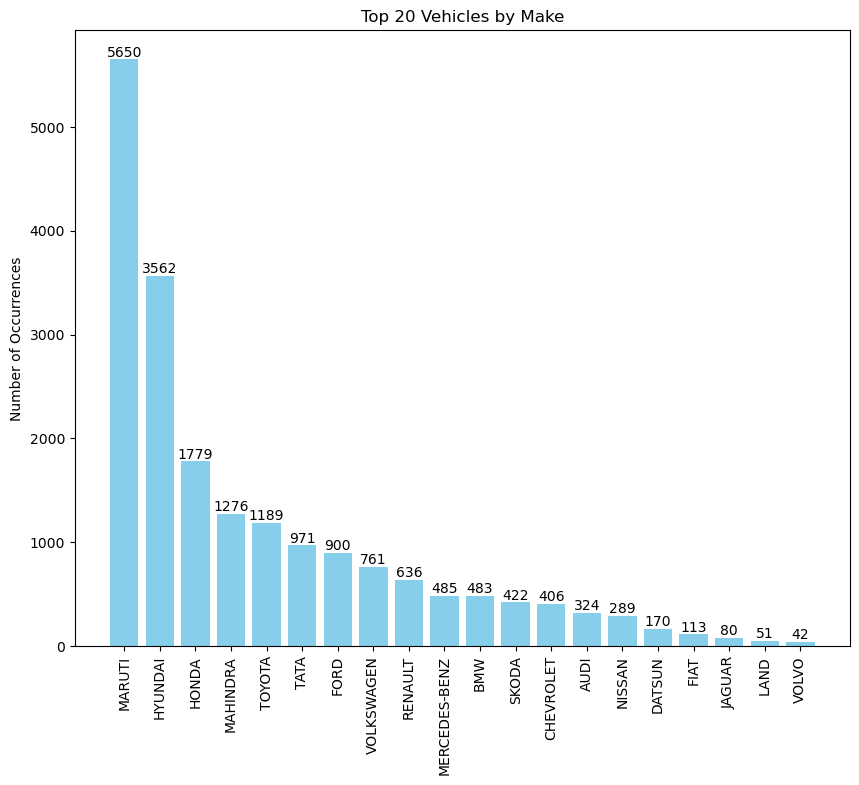

In [262]:

#List of columns to analyze
columns_to_check = ["make"]

#Function to get unique values and their counts
def get_unique_counts(column_name):
    unique_counts = df[column_name].value_counts()
    print(f"\nUnique values and counts for {column_name}:\n")
    # Convert the value counts to a DataFrame for a tabular format
    unique_counts_df = unique_counts.reset_index()
    unique_counts_df.columns = [column_name, "Count"]
    print(unique_counts_df)
    return unique_counts_df

#Apply the function to each column in the list
for column in columns_to_check:
    get_unique_counts(column)

#Count occurrences of each make in the dataset
make_counts = df['make'].value_counts()

#Get the top 20 brands by occurrences
top_20_brands = make_counts.head(20)

#Create a barplot for the top 20 brands
plt.figure(figsize=(10, 8))
bar_positions = plt.bar(top_20_brands.index, top_20_brands.values, color="skyblue")
plt.title("Top 20 Vehicles by Make")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=90)
plt.yticks

#Add the counts on top of the bars
for bar, count in zip(bar_positions, top_20_brands.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2, bar.get_height(),
        str(count), ha='center', va='bottom', fontsize=10, color='black'
    )
plt.show()


The least occuring vehicles in this dataset are Force, Bentley, Ambassador, Opelcorsa, Daewoo, Premier, Maserati, DC, Lamborghini, Ferrari, Mercedes AMG, Rolls Royce and Opel. This is important to note as there isn't alot of supporting data on these brands. Further analysis will prove that some of these brands were consistent outliers in the dataset. Within this study, we have chosen not to treat these outliers. The most frequent makes within the dataset are Maruti with 5650 occurences, Hyundai with 3562 occurences , Honda with 1779 occurences, Mahindra with 1276 occurences and Toyota with 1189 occurences.

In [264]:
#Group by 'make' and 'model' and count occurrences using groupby
model_make_counts = df.groupby(['make', 'model']).size().reset_index(name='count')

#Sort by count in descending order
sorted_model_make_counts = model_make_counts.sort_values(by='count', ascending=False)

#Get the top 20 models
top_20_models_df = sorted_model_make_counts.head(20)
#extract
top_20_models = top_20_models_df['model']
#print
top_20_models_df


,make,model,count
1962,MARUTI,SWIFT DZIRE VDI,288
1647,MARUTI,ALTO 800 LXI,189
2097,MARUTI,WAGON R VXI,164
1993,MARUTI,SWIFT VDI,150
1965,MARUTI,SWIFT DZIRE VXI,136
1671,MARUTI,ALTO K10 VXI,121
1996,MARUTI,SWIFT VDI BSIV,112
1679,MARUTI,ALTO LXI,110
2003,MARUTI,SWIFT VXI,100
910,HYUNDAI,GRAND I10 SPORTZ,94


The top 9 vehicles models in the data set belong to the Maruti make, with the top vehicle models being the SWIFT DZIRE VDI (288 occurrences) , and the ALTO 800 LXI (189 occurrences). Other models that were within the top 20 models belong to the Hyundai, Renault, Honda and Mahindra.


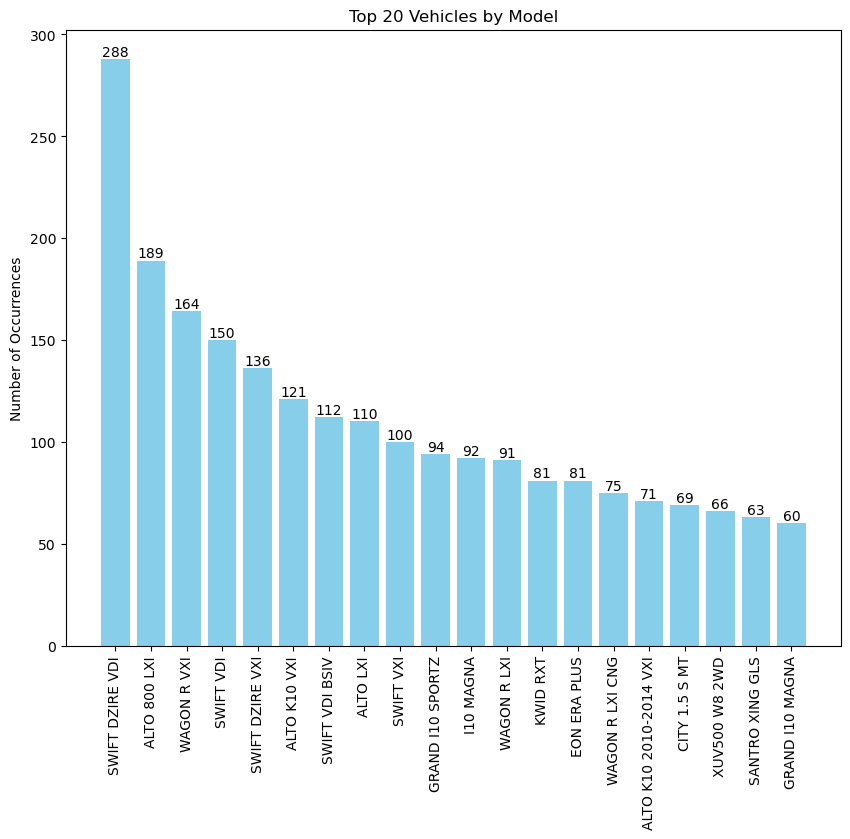

In [266]:

#Create a barplot for the top 20 models
plt.figure(figsize=(10, 8))
bar_positions = plt.bar(top_20_models_df['model'], top_20_models_df['count'], color="skyblue")
plt.title("Top 20 Vehicles by Model")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=90)
plt.yticks(fontsize=10)

#Add the counts on top of the bars
for bar, count in zip(bar_positions, top_20_models_df['count']):
    plt.text(
        bar.get_x() + bar.get_width() / 2, bar.get_height(),
        str(count), ha='center', va='bottom', fontsize=10, color='black'
    )
plt.show()

### Bivariate Analysis

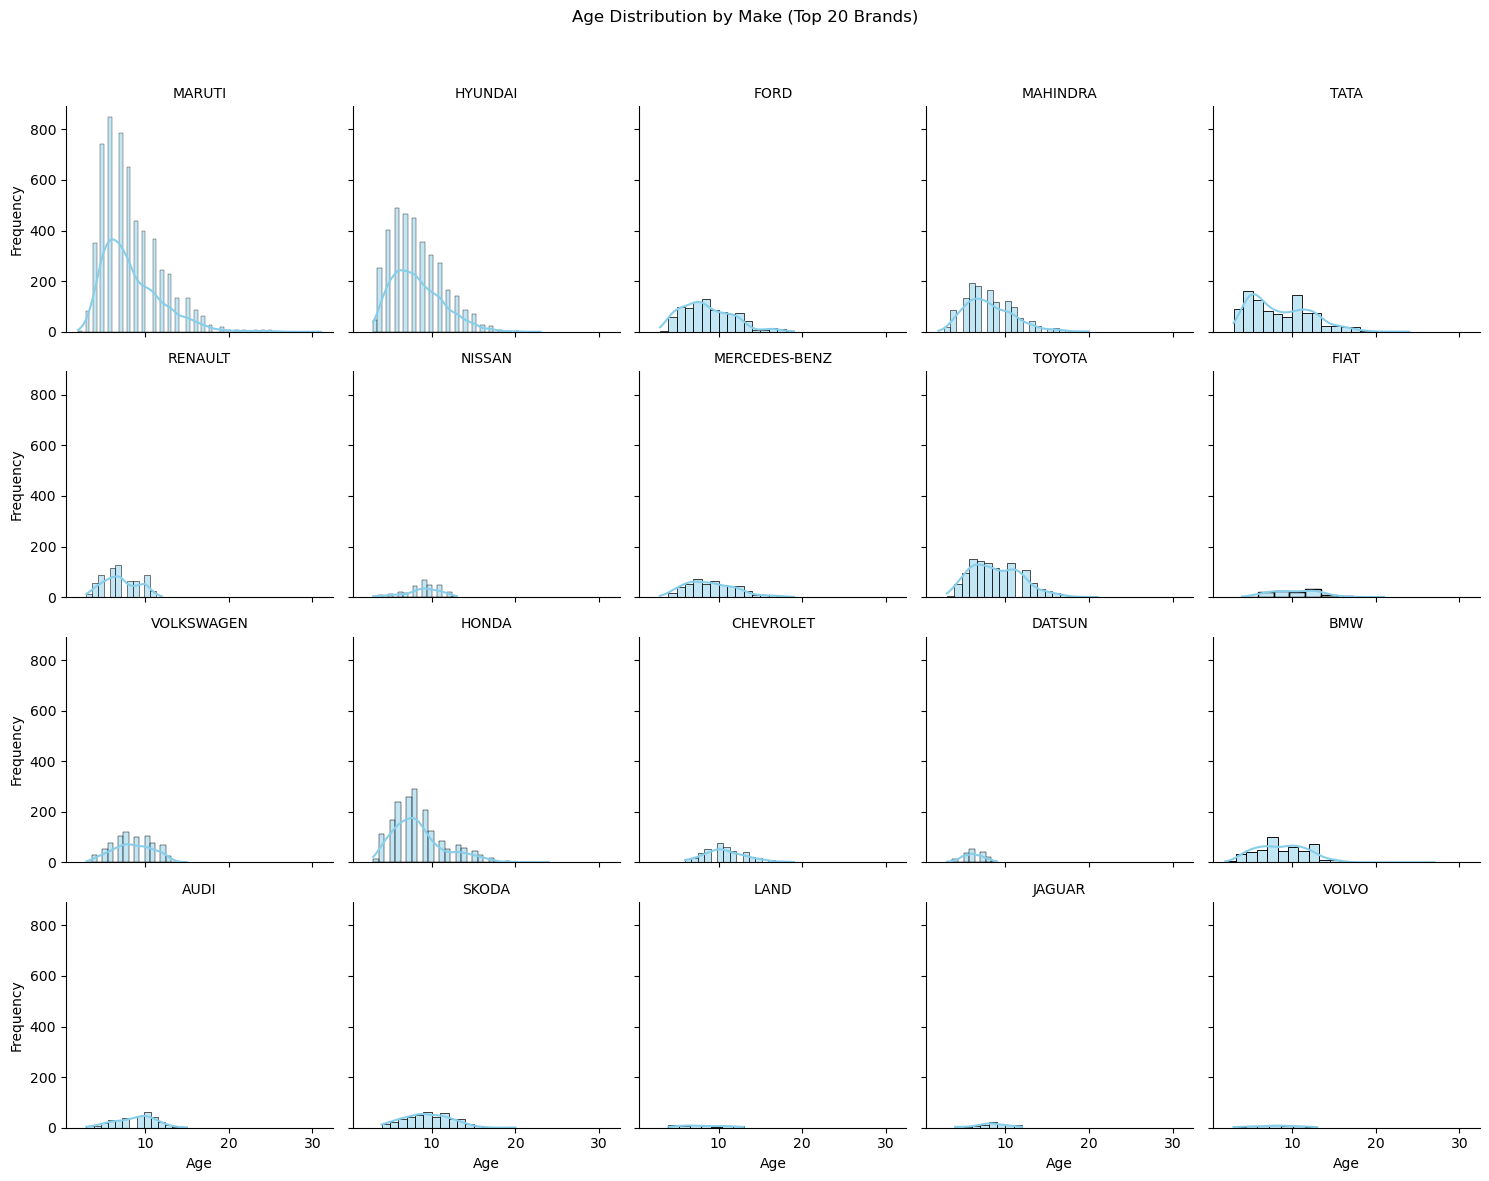

In [268]:
#Age of each vehicle Make
#data needs to be of type dataframe or mapping

top_20_makes_df = df[df['make'].isin(top_20_brands.index)] #index to save into top 20
#top_20_makes_df.head(10) sanity check
g = sns.FacetGrid(top_20_makes_df, col="make", col_wrap=5) #5 columns
g.map(sns.histplot, "age", kde=True, color="skyblue")#include density curve
g.set_titles("{col_name}") #automatically sets the title dynamically within each individaul plot
g.set_axis_labels("Age", "Frequency")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Age Distribution by Make (Top 20 Brands)")
plt.show()


Most vehicles tend to be less than 10 years old. 

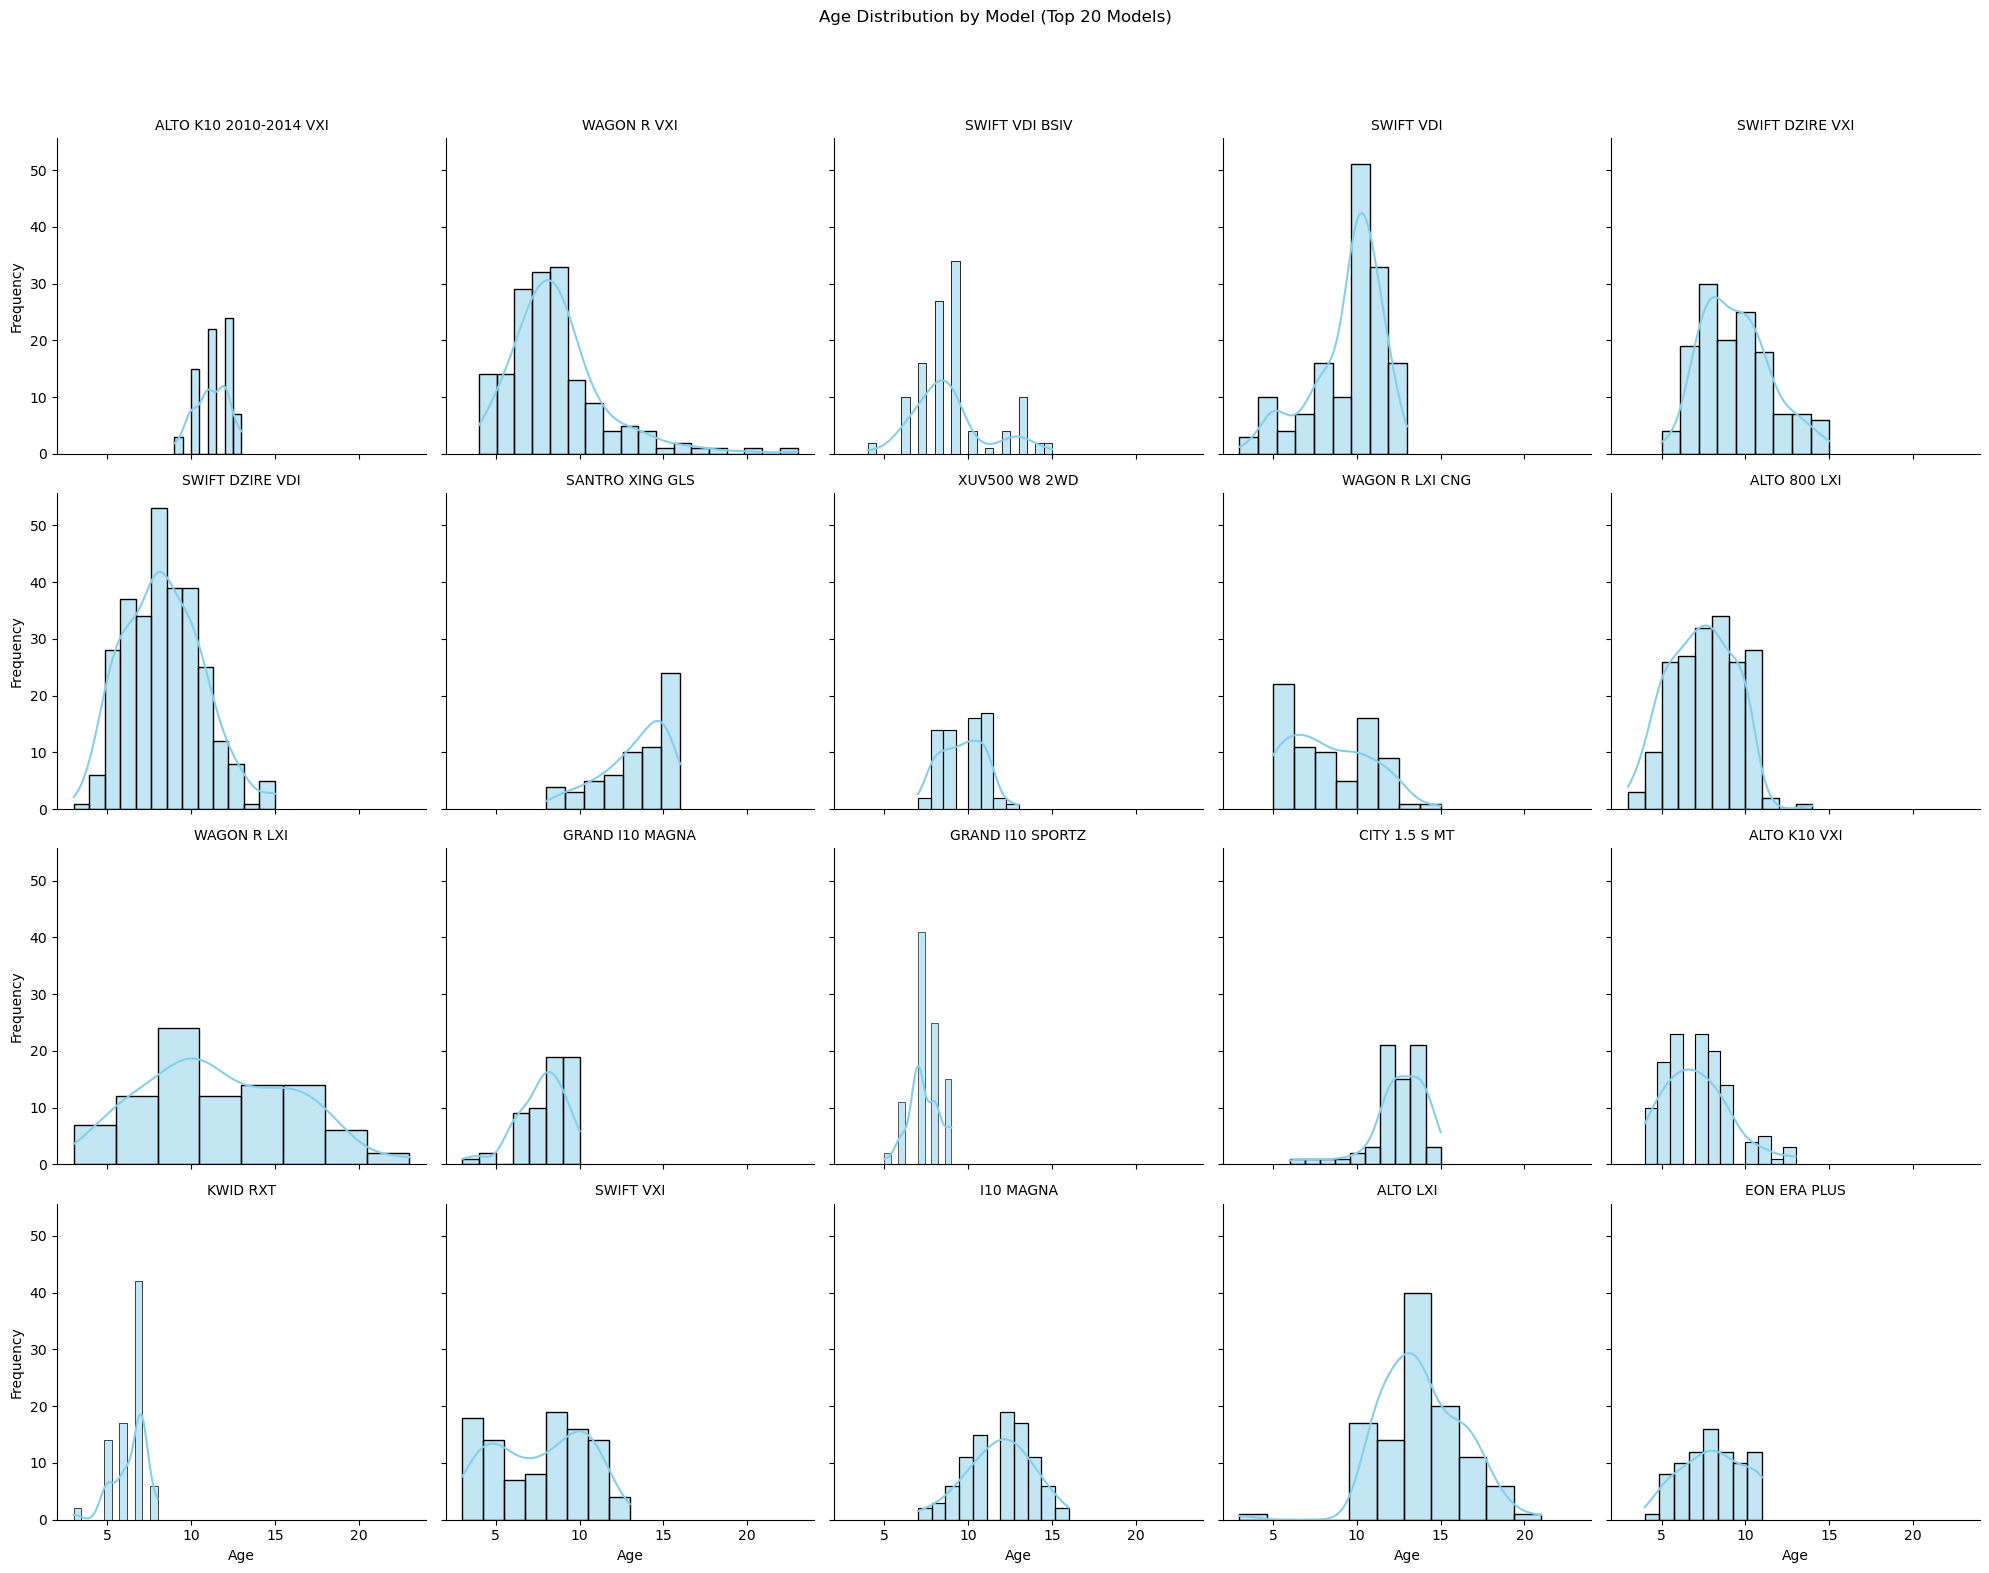

In [270]:
#data needs to be of type dataframe or mapping

top_20_models_data = df[df['model'].isin(top_20_models)]
#top_20_models_data.head(10) #sanity check
# Faceted histogram for the age distribution of top 20 models
g = sns.FacetGrid(top_20_models_data, col="model", col_wrap=5, height=4)#5 columns
g.map(sns.histplot, "age", kde=True, color="skyblue")#include density curve
g.set_titles("{col_name}") #automatically sets the title dynamically within each individaul plot
g.set_axis_labels("Age", "Frequency")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Age Distribution by Model (Top 20 Models)")
plt.show()

The most frequent models within the dataset have a spread of age. The models with large spreads are the Wagon R VXI and the Alto LXI. The KWID RXT and the I10 models are typically under 10 years old

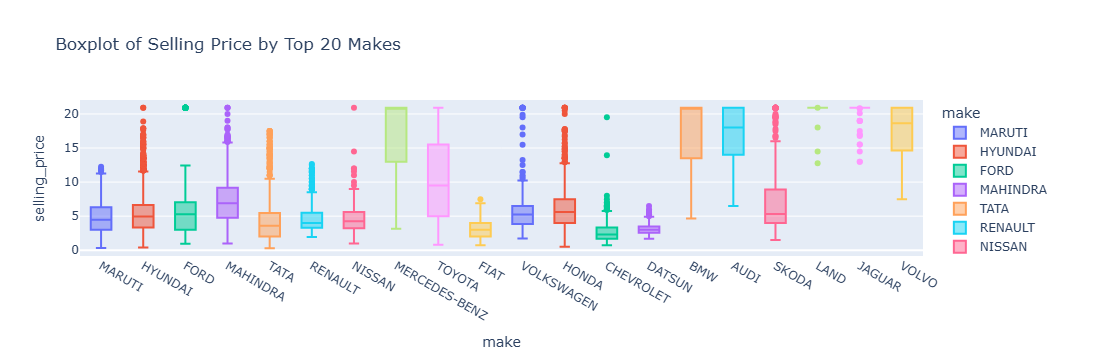

In [272]:
#interactive boxplot using Plotly Express for the Top 20 makes and the selling Price
#https://plotly.com/python/box-plots/
boxtop20 = px.box(
    top_20_makes_df,
    x = "make",
    y= "selling_price",
    color = "make",
    title="Boxplot of Selling Price by Top 20 Makes")

boxtop20.show()


Chevrolet, Datsun and Fiat tend to have the lowest selling prices while Jaguar and Land tend to have higher selling prices. Makes witha large spread of selling prices include Mercedes- Benz and Toyota.

             Make  Mean Selling Price
0      AMBASSADOR            1.452500
1            AUDI           17.177585
2         BENTLEY           20.902500
3             BMW           17.349017
4       CHEVROLET            2.723621
5          DAEWOO            0.780000
6          DATSUN            3.205176
7              DC           11.925000
8         FERRARI           20.902500
9            FIAT            3.152795
10          FORCE            5.520000
11           FORD            5.858258
12          HONDA            5.979902
13        HYUNDAI            5.458819
14          ISUZU           14.037708
15         JAGUAR           20.187500
16           JEEP           16.261890
17            KIA           15.731515
18    LAMBORGHINI           20.902500
19           LAND           20.560147
20          LEXUS           20.902500
21       MAHINDRA            7.315421
22         MARUTI            4.684721
23       MASERATI           20.902500
24   MERCEDES-AMG           20.902500
25  MERCEDES

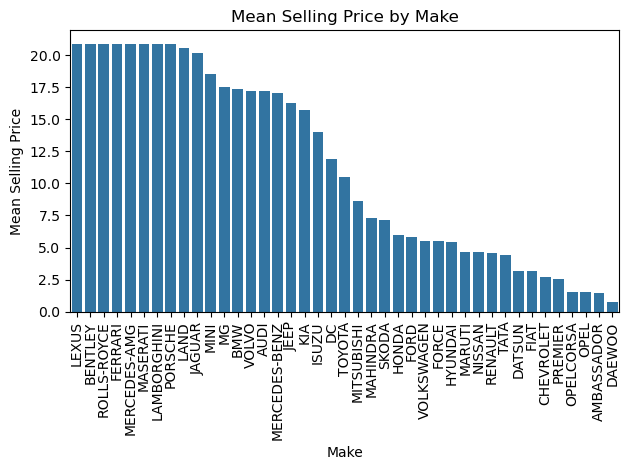

In [274]:
#mean selling price by make
#table that shows mean price by make
mean_selling_price_by_make = df.groupby('make')['selling_price'].mean().reset_index()
mean_selling_price_by_make.columns = ['Make', 'Mean Selling Price']
print(mean_selling_price_by_make)
#Sort df by mean selling priceusing groupby
mean_selling_price_by_make = mean_selling_price_by_make.sort_values(by='Mean Selling Price', ascending=False)


sns.barplot(data=mean_selling_price_by_make, x='Make', y='Mean Selling Price')
plt.title("Mean Selling Price by Make")
plt.xlabel("Make")
plt.ylabel("Mean Selling Price")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

 

 The brands with the highest average selling price are Lexus, Bentley, Rolls Royce, Ferrari, Mercedes Benz, Maserati, Lamborghini, Porche, Land and Jaguar.

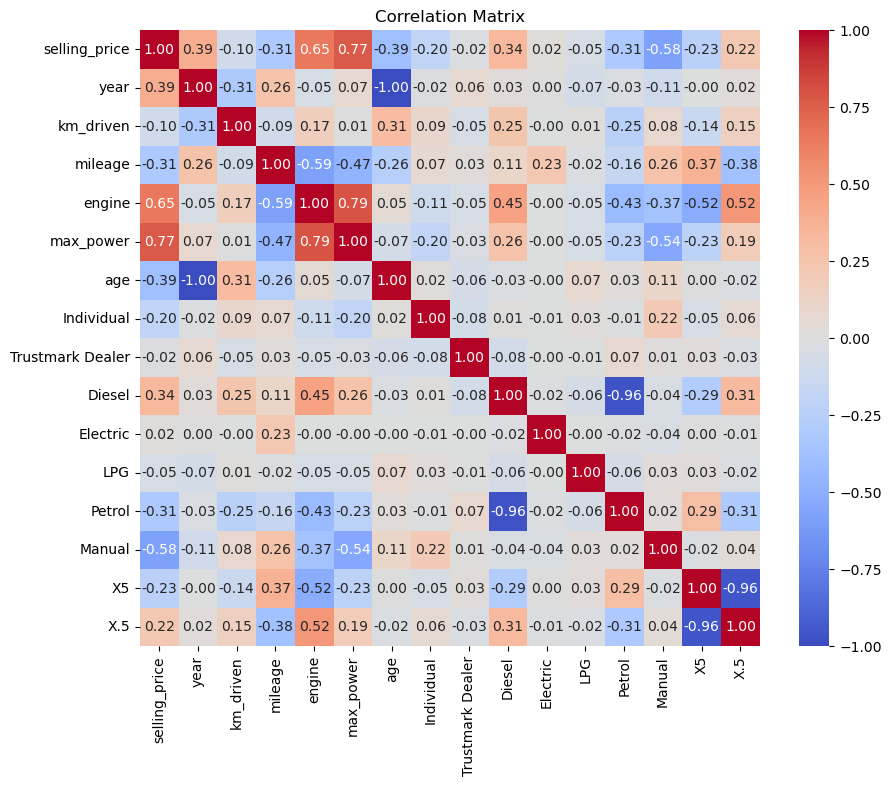

In [276]:
#corr matrix to see relationships between variables
#correlation matrix for all numerical values this code doesnt wok bc it finds the strings
#correlation_matrix = df.corr()

# Select only the numerical columns for correlation calculation
numerical_data = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
#print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Correlation Matrix's are a great way to visualize relationships between variables in bivariate analysis- and great for establishing collinearity.

#### Collinear relationships:
- **Age** and **Year** negative correlation (-1)
- **Diesel** and **Petrol** negative correlation (-.96)
- **X5** and **X.5** negative correlation (-.96)
- **Engine** and **Max Power** positive correlation (.79)
- **Max Power** and **Selling Price** positive correlation (.77)

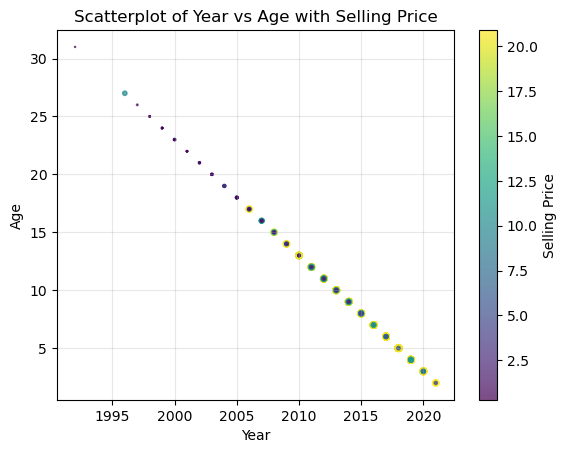

In [278]:
#Year and Age Scatterplot
year_age_scatter = plt.scatter(
    x=df['year'], 
    y=df['age'], 
    c=df['selling_price'],  #Color based on selling price
    s=df['selling_price'], 
    alpha=0.7,  # Transparency
)

#color bar for selling price
cbar = plt.colorbar(year_age_scatter)
cbar.set_label('Selling Price')
plt.title("Scatterplot of Year vs Age with Selling Price")
plt.xlabel("Year")
plt.ylabel("Age")
plt.grid(alpha=0.3)


plt.show()


Age and Year are perfectly negatively correlated as this scatterplot is clearly representing. One can note the overlap that exists between these two variables. Additionally, relating to selling price- one can conlude that newer and younger vehicles do tend to sell for higher prices.

## Multicollinearity-a potential problem?
>  Multicollinearity occurs when independent variables are highly correlated. Multicollinearity can lead to incorrect conclusions about the relationship between variables creating **model misspecification**. Multicollinearity can unfortunately lead to incorrect conclusions about the relationships between variables. Multicollinearity makes it hard to determine the unique contribution of each predictor to the dependent variable. High correlation among independent variables can artificially inflate the model’s R² value. **Stepwise regression** can help eliminate variables as long as significance and Pvalues prove explanatory power to the model. **Variance Inflation Factor (VIF)** shows what percentage of the variance is inflated for each coefficient.


## Data Cleaning and Feature Cleaning

To simplify the model and reduce multicollinearity issues within dummy variables, make and models are dropped.

In [283]:
df_copy = df.copy() #keep for sanity checks
df.drop(['make', 'model'], axis=1, inplace=True)
df_copy = df.copy() #keep for sanity checks
df.head() #sanity check
df_copy.head()# make sure these two match

,selling_price,year,km_driven,mileage,engine,max_power,age,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,X5,X.5
0,1.20,2012,120000,19.70,796.0,46.30,11,1,0,0,0,0,1,1,1,0
1,5.50,2016,20000,18.90,1197.0,82.00,7,1,0,0,0,0,1,1,1,0
2,2.15,2010,60000,17.00,1197.0,80.00,13,1,0,0,0,0,1,1,1,0
3,2.26,2012,37000,20.92,998.0,67.10,11,1,0,0,0,0,1,1,1,0
4,5.70,2015,30000,22.77,1498.0,98.59,8,0,0,1,0,0,0,1,1,0


Since our predictor is selling price, we split 'selling_price' as the independent variable. All other features become dependent variables. A constant term is added to account for the intercept, and an Ordinary Least Squares (OLS) regression is performed to evaluate the impact of each feature and the overall model's performance.

In [285]:
#Set dependent and independent variable
y = df['selling_price'] #independent 
X = df.drop(columns=['selling_price'])#dependent

#Add a constant for the intercept term
X = sm.add_constant(X)



### What is Variance Inflation Factor (VIF)?


VIF measures the severity of multicllinearity of each predictor within a given dataset.


### Interpretation of VIF

- **VIF = 1:** No multicollinearity.
- **VIF between 1 and 5:** Moderate multicollinearity.
- **VIF > 10:** High multicollinearity- usually indicitive of collinearity problems
- **VIF should be used more as a tool and less of a solution for multicollinearity**

### Function to analyze VIF

This function lists the VIF of all predictors.

In [289]:
# Function to Analyze VIF
def checking_vif(predictors):
    """
    Calculate Variance Inflation Factor (VIF) for the given predictors.

    Args:
        predictors (pd.DataFrame): The predictor variables (including constant term).

    Returns:
        pd.DataFrame: DataFrame containing features and their VIF values.
    """
    # Ensure the input is a DataFrame
    if not isinstance(predictors, pd.DataFrame):
        raise ValueError("Input must be a pandas DataFrame.")
    
    # Ensure predictors include at least two columns (independent vars and constant)
    if predictors.shape[1] < 2:
        raise ValueError("Input must include at least two columns (e.g., constant and one predictor).")

    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif


In [290]:
#Fit the regression model featuring selling price as the predicted value
model = sm.OLS(y, X).fit()

#View the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     4953.
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:04:17   Log-Likelihood:                -44500.
No. Observations:               19820   AIC:                         8.903e+04
Df Residuals:                   19805   BIC:                         8.915e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0003   2.89e-06  

The initial model performed well! The Rsquared of the model is .7778 , meaning approximately 77.78% of all the variability in the selling price is being explained by all the variables. Adjusted R squared is .7778.

To diagnose multicollinearity, we check the VIF using checking_vif function.

In [293]:
vif_results = checking_vif(X)
print(vif_results)

C:\Users\Owner\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning:

divide by zero encountered in scalar divide

C:\Users\Owner\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



             feature        VIF
0              const   0.000000
1               year        inf
2          km_driven   1.228493
3            mileage   3.103632
4             engine   6.250776
5          max_power   4.024651
6                age        inf
7         Individual   1.085106
8   Trustmark Dealer   1.020435
9             Diesel  16.985109
10          Electric   1.165349
11               LPG   1.237391
12            Petrol  17.839330
13            Manual   1.535600
14                X5  12.057470
15               X.5  13.183576


If we run the VIF function of year and age,we will see the VIF of age and year are of infinite values- thus, it is a good idea to drop one of these features.

Rerunning the model as model1, dropping 'year':

In [295]:

#Set dependent and independent variable
y = df['selling_price'] #independent 
X = df.drop(columns=['selling_price','year'])#dependent

#Add a constant for the intercept term
X = sm.add_constant(X)

#Fit the regression model
model1 = sm.OLS(y, X).fit()

#View the summary of the regression model
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     4953.
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:04:17   Log-Likelihood:                -44500.
No. Observations:               19820   AIC:                         8.903e+04
Df Residuals:                   19805   BIC:                         8.915e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               11.5740      0.318  

In [296]:
#model1 VIF results
vif_results2 = checking_vif(X)
print(vif_results2)

             feature         VIF
0              const  382.652119
1          km_driven    1.228493
2            mileage    3.103632
3             engine    6.250776
4          max_power    4.024651
5                age    1.371166
6         Individual    1.085106
7   Trustmark Dealer    1.020435
8             Diesel   16.985109
9           Electric    1.165349
10               LPG    1.237391
11            Petrol   17.839330
12            Manual    1.535600
13                X5   12.057470
14               X.5   13.183576


In [297]:
#What happens when we drop Petrol
#Set dependent and independent variable
y = df['selling_price'] #independent 
X = df.drop(columns=['selling_price','year','Petrol'])#dependent

#Add a constant for the intercept term
X = sm.add_constant(X)

#Fit the regression model
model2 = sm.OLS(y, X).fit()

#View the summary of the regression model
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     5302.
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:04:18   Log-Likelihood:                -44547.
No. Observations:               19820   AIC:                         8.912e+04
Df Residuals:                   19806   BIC:                         8.923e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.8932      0.267  

In [298]:
vif_results3 = checking_vif(X)
print(vif_results3)

             feature         VIF
0              const  268.305661
1          km_driven    1.226651
2            mileage    2.874447
3             engine    6.176241
4          max_power    4.022456
5                age    1.367855
6         Individual    1.081587
7   Trustmark Dealer    1.019400
8             Diesel    2.033092
9           Electric    1.162692
10               LPG    1.011332
11            Manual    1.535571
12                X5   12.041870
13               X.5   13.180752


In [299]:
#What happens when we drop year, Petrol and X.5
#Set dependent and independent variable
y = df['selling_price'] #independent 
X = df.drop(columns=['selling_price','year','Petrol','X.5'])#dependent

#Add a constant for the intercept term
X = sm.add_constant(X)

#Fit the regression model
model3 = sm.OLS(y, X).fit()

#View the summary of the regression model
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     5740.
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:04:18   Log-Likelihood:                -44552.
No. Observations:               19820   AIC:                         8.913e+04
Df Residuals:                   19807   BIC:                         8.923e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.3313      0.204  

In [300]:
#model1 VIF results
vif_results4 = checking_vif(X)
print(vif_results4)

             feature         VIF
0              const  156.940067
1          km_driven    1.224707
2            mileage    2.763159
3             engine    6.089823
4          max_power    3.836490
5                age    1.313607
6         Individual    1.081500
7   Trustmark Dealer    1.019322
8             Diesel    1.985553
9           Electric    1.159214
10               LPG    1.011320
11            Manual    1.524591
12                X5    1.678576


Model3 is final model but high p value present. Dropping the column X5 as it has the highest pvalue of .496

In [302]:
#What happens when we drop Petrol and X.5
#Set dependent and independent variable
y = df['selling_price'] #independent 
X = df.drop(columns=['selling_price','year','Petrol','X.5','X5'])#dependent

#Add a constant for the intercept term
X = sm.add_constant(X)

#Fit the regression model
model4 = sm.OLS(y, X).fit()

#View the summary of the regression model
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     6262.
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:04:19   Log-Likelihood:                -44552.
No. Observations:               19820   AIC:                         8.913e+04
Df Residuals:                   19808   BIC:                         8.922e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.2994      0.198  

Successfully removing multicollinear variables and high p-values from our model, our new R-squared is .777 meaning that 77.7%of all the variability in the selling price is being explained by all the variables. Adjusted R squared is .777 as well.

In [303]:
final_model=model4

## Testing Model Linearity Assumptions

Multicollinearity- VIF

Linearity and Independence- Residual Plot

Normality- Histogram of Residuals and QQ Plot

Homoscedasticity- Residual Plot


In [306]:
#Extract residuals from the model
residuals = final_model.resid

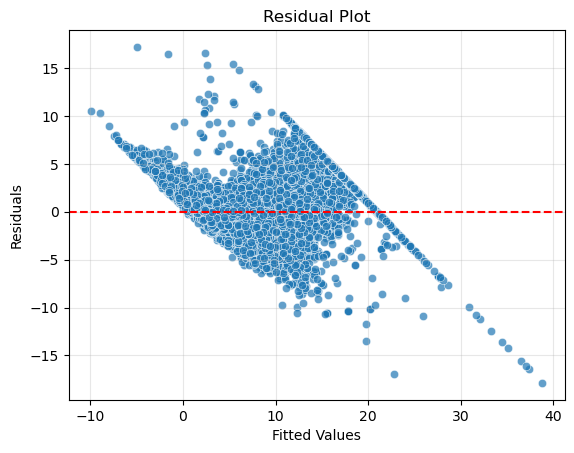

In [307]:
#Residual Plot
sns.scatterplot(x=model4.fittedvalues, y=residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle= '--')
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(alpha=0.3)
plt.show()

Ideally, for the residual plot, a random non-pattern is preferred to assume linearity and independence. Due to the pattern, we can later test for homoscedacity. Since there is a pattern, we can assume that linearity and independence is not met.

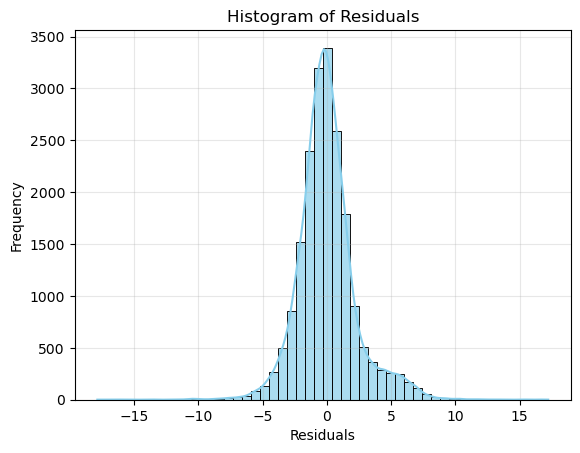

In [309]:
# Histogram of the Residuals
sns.histplot(residuals, kde=True, bins=50, color='skyblue', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()

The histogram of residuals is showing a bell shaped curve, suggesting normality. On the tail right, there is a slight skew from normality.

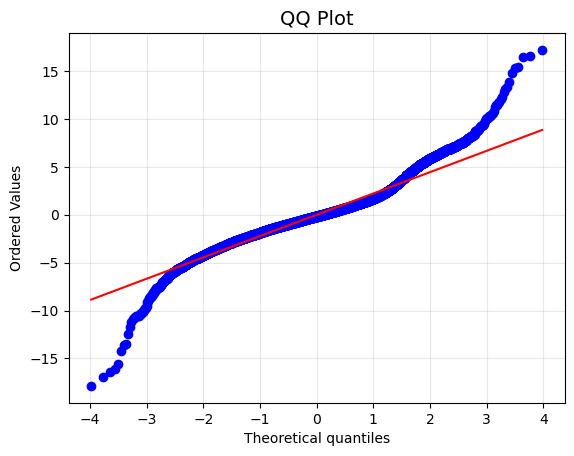

In [311]:
#QQplot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot', fontsize=14)
plt.grid(alpha=0.3)
plt.show()

Examining this qqplot, we can assume near normality as the points lay close to the 45 degree line. However, the deviations that are present at the tails suggest non-normality in residuals which can also be observed in the histogram of residuals.

## Conclusion

Although we were able to address multicollinearity by analyzing the VIF through stepwise regression, the model failed other linearity assumptions. Through this excersise we were able to observe increased stabilityof the regression model and the reliability of predictors.

## Actionable Insights and Recommendations

Future models could benefit from exploring feature transformations or regularization techniques to further address multicollinearity challenges. Other suggestions would be utilizing PCA, Ridge Regression, Clustering, or Lasso to further enhance model robustness and address multicollinearity effectively since these techniques can handle multicollinearity.

In [379]:
!jupyter nbconvert --to pdf "C:\Users\Owner\Documents\Python Notes\Python assignments\VIF presentation.ipynb"




[NbConvertApp] Converting notebook C:\Users\Owner\Documents\Python Notes\Python assignments\VIF presentation.ipynb to pdf
[NbConvertApp] ERROR | Error while converting 'C:\Users\Owner\Documents\Python Notes\Python assignments\VIF presentation.ipynb'
Traceback (most recent call last):
  File "C:\Users\Owner\anaconda3\Lib\site-packages\nbconvert\nbconvertapp.py", line 479, in export_single_notebook
    output, resources = self.exporter.from_filename(
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Owner\anaconda3\Lib\site-packages\nbconvert\exporters\templateexporter.py", line 389, in from_filename
    return super().from_filename(filename, resources, **kw)  # type:ignore[return-value]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Owner\anaconda3\Lib\site-packages\nbconvert\exporters\exporter.py", line 203, in from_filename
    return self.from_file(f, resources=resources, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
 